# Face Recognition using SVM

In this notebook we will recognize faces using SVM model.  
We will cover the following topics:  
<ol>
    <li>Data Exploration: 
        <ol>
              <li>Data shapes</li>
              <li>Show the data</li>
              <li>Plot frequency of each class/person</li>
        </ol>
    </li>
    <li>Data Preparation:
        <ol>
            <li>Split the data into train and test sets</li>
            <li>Reshape the data</li>
        </ol>
    </li>
    <li>Try building first pipeline with PCA and SVM</li>
    <li>Make list of classification models to check with PCA</li>
    <li>Train models and check which is the best fit using cross validation</li>
    <li>Show accuracy score and classification report</li>
    <li>Use cross validation method to check the accuracy of the models</li>
</ol>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

**Load the data**

In [4]:
faces = np.load("./data/olivetti_faces.npy")
target = np.load("./data/olivetti_faces_target.npy")

Check shapes of the data and see the first face image

In [6]:
faces.shape

(400, 64, 64)

In [7]:
target.shape

(400,)

In [8]:
faces[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

**The data has been scaled to range of (0,1)**

**Lets see the data (faces) we are dealing with:**

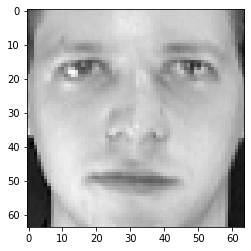

In [11]:
plt.imshow(faces[0], cmap='gray')

**Lets visualize the first 40 pictures:**

In [21]:
def show_n_faces(nrows, ncols, data):
    fig, ax = plt.subplots(nrows, ncols, figsize=(15,5))
    for img, axi in zip(data, ax.flatten()):
        axi.imshow(img, cmap='gray')
        axi.set(xticks=[], yticks=[])

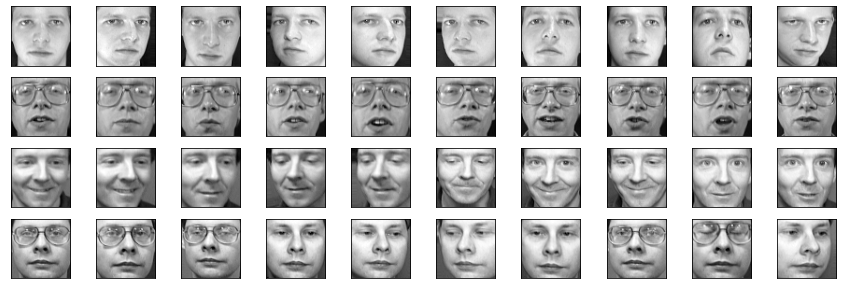

In [24]:
show_n_faces(nrows=4, ncols=10, data=faces[:40])

There are 40 distinct people in this dataset, each of them has set of 10 pictures taken in different angle, face expression and light.

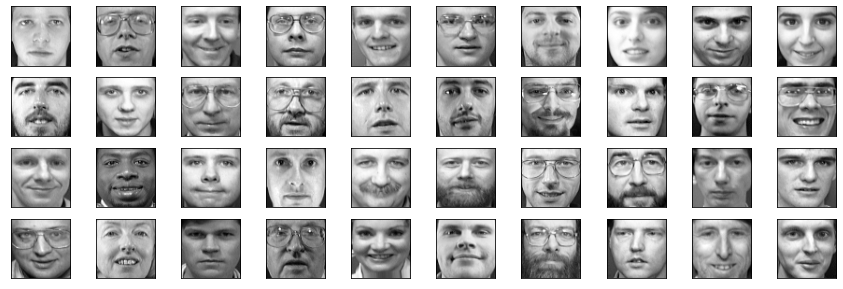

In [40]:
indices = np.arange(0,400,10)
show_n_faces(nrows=4, ncols=10, data=faces[indices])

**Lets explore the classification target values**

In [27]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

From the histogram plot below we can say that we have a **balanced dataset**

In [44]:
def show_bars(data, _range):
    plt.figure(figsize=(20,5))
    plt.bar(data, height=max(data))
    plt.xticks(_range)
    plt.show()

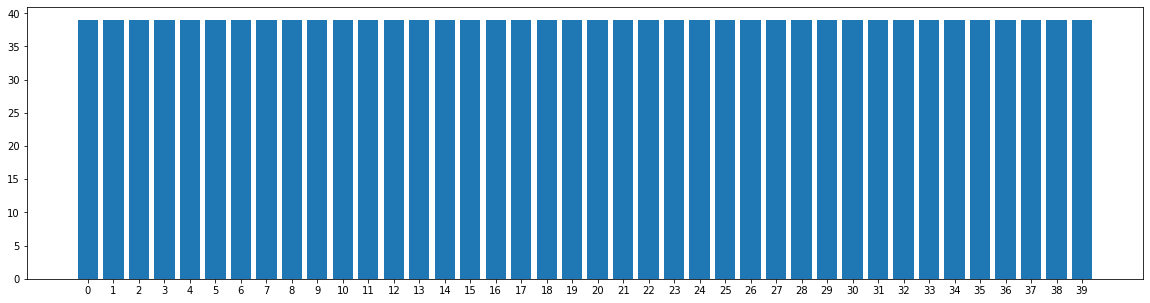

In [45]:
show_bars(target, np.array(np.arange(0,40)))

## Data Preparation

### Splitting the data

Since we also want our train and test sets to be balanced we will need to use `stratify` argument to specify that our target should be balanced according to that data.

**If we will not use `stratify` this will be the result train and test sets:**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces, target, test_size=0.3, random_state=0)

<AxesSubplot:xlabel='ids'>

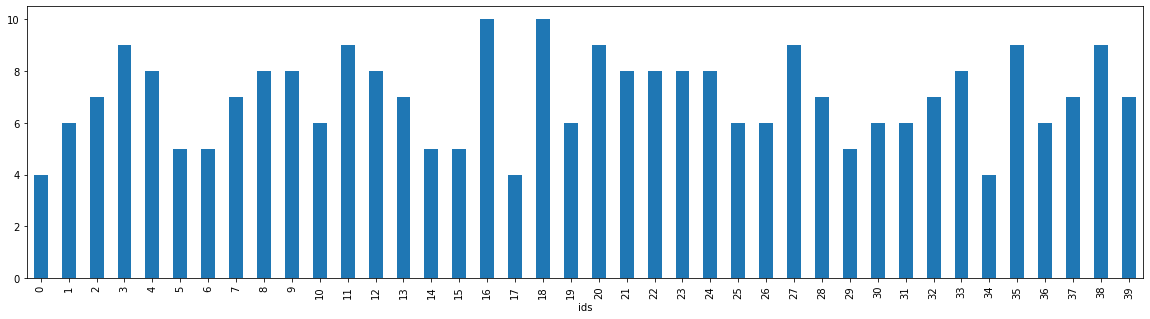

In [53]:
plt.figure(figsize=(20,5))
pd.DataFrame({"ids": y_train}).groupby("ids").size().plot.bar()

**This is way using `stratify` is very important in our case**

Plotting the results after using `stratify` argument shows us balanced dataset

In [54]:
X_train, X_test, y_train, y_test = train_test_split(faces, target, test_size=0.3, stratify=target, random_state=0)

<AxesSubplot:xlabel='ids'>

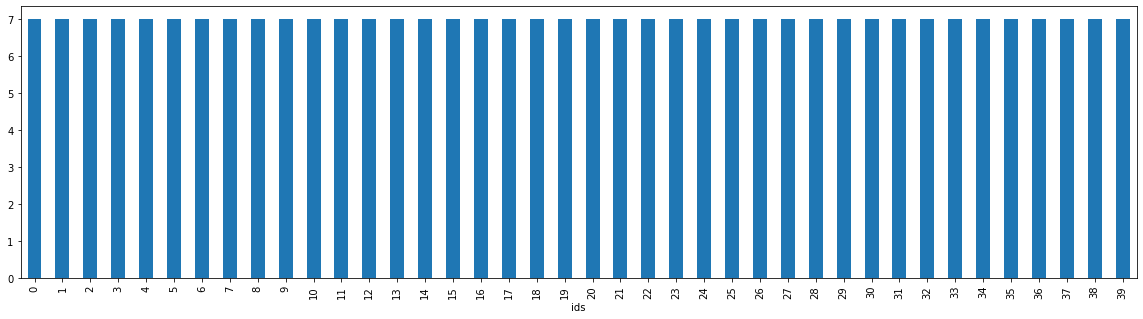

In [55]:
plt.figure(figsize=(20,5))
pd.DataFrame({"ids": y_train}).groupby("ids").size().plot.bar()

### Reshape the data

Since we are going to use PCA we will need to reshape our data.  

Lets recall the shape of our `X_train`:

In [61]:
X_train.shape

(280, 64, 64)

When passing to `reshape(n, -1)`, numpy will convert the shape to the product of the rest dimensions.  
We could also use in order to achieve the same result:  
`X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])`  

In [62]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(280, 4096)

In [68]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test.shape

(120, 4096)

## Building first pipeline using PCA and SVM

Our pipeline will be composed of dimension reduction algorithm and then feed the results into a classification classifier.  

The first pipeline will include the following:
<ol>
    <li><b>PCA (Principal Component Analysis)</b> - dimension reduction algorithm</li>
    <li><b>SVM (Support Vector Machines)</b> - classification classifier</li>
</ol>

In [93]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=2)
svc = SVC()
pipe = make_pipeline(pca, svc)

Execute the pipeline and training the classifier using the fit method

In [94]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('svc', SVC())])

Make predictions on the test set

In [95]:
preds = pipe.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def check_results(y_test, preds):
    score = accuracy_score(y_test, preds)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_test, preds), cmap=plt.cm.RdBu)
    plt.title("Accuracy: {:.2f}".format(score))
    plt.show()
    print(classification_report(y_test, preds))
    return score

`accuracy_score()` method gives us a **low classification score of 0.23**

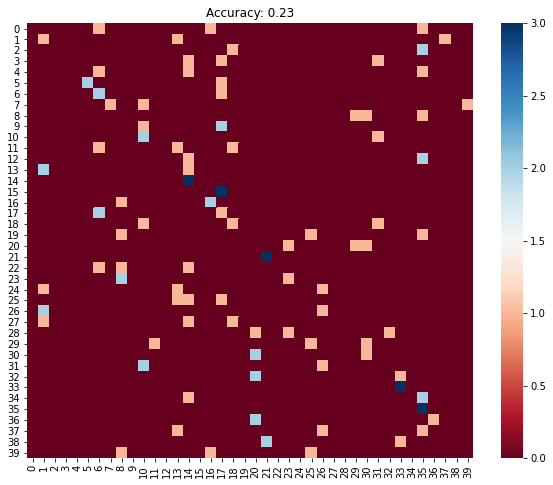

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.14      0.33      0.20         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.25      0.67      0.36         3
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.29      0.67      0.40         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.27      1.00      0.43         3
          15       0.00      0.00      0.00         3
          16       0.50      0.67      0.57         3
          17       0.10    

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.23333333333333334

In [131]:
check_results(y_test, preds)

### Trying modify PCA and SVM

**PCA - Search for best n_component**  
We will use the `inertia` parameter (`pca.explained_variance_`) of `PCA` to get the percentage of data that can be explanied

In [114]:
pca_check = PCA()
pca_check.fit(X_train)

PCA()

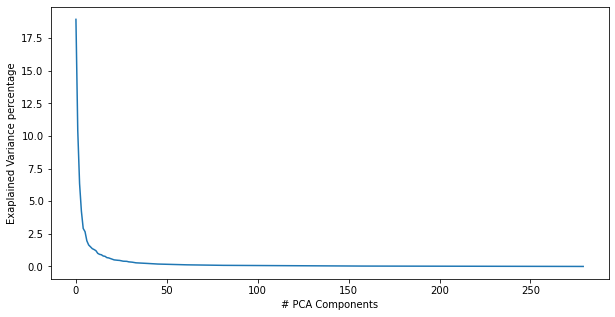

In [220]:
plt.figure(figsize=(10,5))
plt.plot(pca_check.explained_variance_)
plt.xlabel("# PCA Components")
plt.ylabel("Exaplained Variance percentage")
plt.show()

**We can say for certain that from around 50 components there is no change of percentage. we want less components, so we will check the range of components between 20 to 70, with spaces of 5, and plot the accuracies**

In [141]:
def make_pipe_predict(X, y_train, y_test, n_comps = 90):
    pca = PCA(n_comps)
    svc = SVC()
    pipe = make_pipeline(pca, svc)
    pipe.fit(X, y_train)

    preds = pipe.predict(X_test)
    return preds

Lets create a function to show the results better:

In [175]:
def show_results(accuracies, n_compos):
    plt.figure(figsize=(5,5))
    plt.plot(accuracies)
    plt.xticks(range(len(n_compos)), np.array(n_compos))
    plt.xlabel("# Components")
    plt.ylabel("Accuracy")
    plt.show()

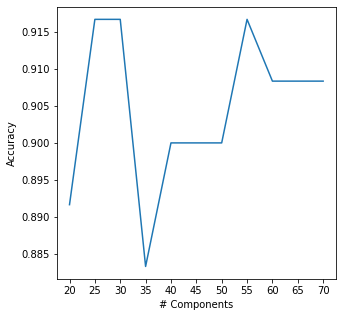

In [176]:
n_compos = np.arange(20, 75, 5)
accuracies = []
for comp in n_compos:
    preds = make_pipe_predict(X_train, y_train, y_test, comp)
    score = accuracy_score(y_test, preds)
    accuracies.append(score)

show_results(accuracies, n_compos)

In [177]:
max_score = np.array(accuracies).max()
max_score

0.9166666666666666

We achieved an accuracy of `91.6%` with `25 & 30 components` and also with `55 components`, **we will choose to use 25 components as it gives us the same accuracy**

In [203]:
from sklearn.model_selection import cross_val_score, KFold
pca = PCA(25)
svc = SVC()
pipe = make_pipeline(pca, svc)
kfold = KFold(n_splits=30)
cv = cross_val_score(pipe, X_train, y_train, cv=kfold)
print("mean cross validation score: {}".format(cv.mean()))

mean cross validation score: 0.8818518518518519


## List of classification algorithms

We will now try different classification algorithms to see if there is a better fit for our data.  
We will use the following algorithms:
<ol>
    <li>Logistic Regression</li>
    <li>Linear Discriminant Analysis (LDA)</li>
    <li>KNeighbors Classifier (KNN)</li>
    <li>SVM (Support Vector Machine)</li>
</ol>

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

clfs = [LogisticRegression(), LinearDiscriminantAnalysis(), KNeighborsClassifier(5), SVC()]

With each classification model we will test the accuracy with PCA as the dimension reduction and check the cross validation results:

In [211]:
means = []
for clf in clfs:
    pipe = make_pipeline(pca, clf)
    kfold = KFold(n_splits=30)
    cv = cross_val_score(pipe, X_train, y_train, cv=kfold)
    print("mean cross validation with {} is: {}".format(pipe.steps[1][0], cv.mean()))
    means.append(cv.mean())

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

mean cross validation with logisticregression is: 0.9392592592592592
mean cross validation with lineardiscriminantanalysis is: 0.961111111111111
mean cross validation with kneighborsclassifier is: 0.7414814814814815
mean cross validation with svc is: 0.8818518518518519


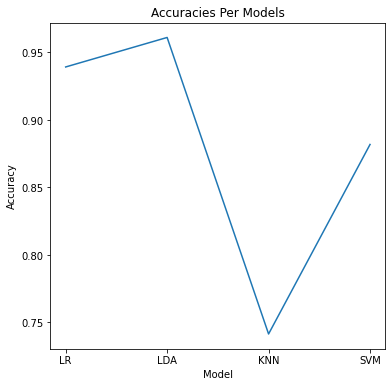

In [216]:
plt.figure(figsize=(6,6))
plt.plot(means)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(range(4), ["LR", "LDA", "KNN", "SVM"])
plt.title("Accuracies Per Models")
plt.show()

From the test above we can say that `PCA` with `LDA` has been the **most accurate** pipeline 

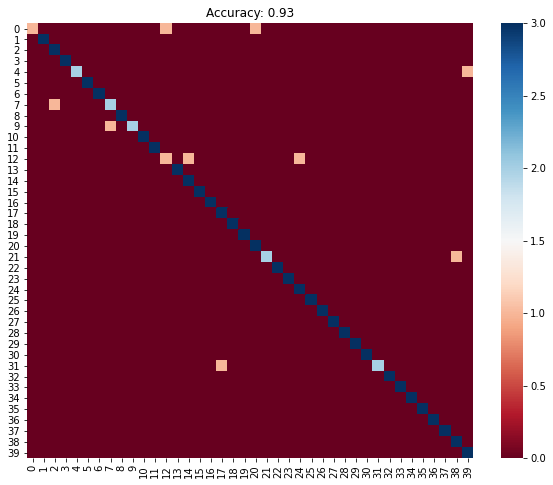

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       0.75    

0.925

In [221]:
lda = LinearDiscriminantAnalysis()
pipe = make_pipeline(pca, lda)
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)
check_results(y_test, preds)

# Conclusion

In this notebook we saw how a combination of dimension reduction algorithm and classification algorithms like `SVM` can recognize faces.  
We built a pipeline using `sklearn.pipline` option to customize our pipeline when we change classification classifier.  

We also learned how to choose n_components for the `PCA` algorithm and how to make better validation on our model using `cross validation`.  

In our data we saw that when combining `PCA` and `Linear Discriminant Analysis (LDA)` we are getting the best accuracy.